## Appendix B5. Boost Methods

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

save_figures = False
figure_path = "../figures/models/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
# df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")
df_tt_train = pd.read_parquet("../data/prep_tt_train.parquet")
df_tt_test = pd.read_parquet("../data/prep_tt_test.parquet")

In [2]:
df_tt_train.head()

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.474255,-1.160118,0.858181,1
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.794531,0.589356,0.858181,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,-1.160118,0.858181,0


In [3]:
X_tt_train = df_tt_train.iloc[:,0:-1].to_numpy()
y_tt_train = df_tt_train["y"].to_numpy()

X_tt_test = df_tt_test.iloc[:,0:-1].to_numpy()
y_tt_test = df_tt_test["y"].to_numpy()

### Adaboost, Default Parameter

In [4]:
n_each_class = [np.sum(y_tt_train == each_c) 
                for each_c 
                in np.unique(y_tt_train)]

weight_each_class = [1/each_n 
                     for each_n 
                     in n_each_class]

balanced_weights = np.array([weight_each_class[each_y] 
                             for each_y 
                             in y_tt_train])
balanced_weights.shape

(3387,)

In [5]:
%%time

random_state = 132
Ada_default = AdaBoostClassifier(random_state= random_state)
Ada_default.fit(X_tt_train, y_tt_train, sample_weight=balanced_weights)

Wall time: 230 ms


AdaBoostClassifier(random_state=132)

In [6]:
Ada_default.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 132}

In [7]:
y_pred_ada_default = Ada_default.predict(X_tt_test)

In [8]:
print(balanced_accuracy_score(y_tt_test, y_pred_ada_default))
print(accuracy_score(y_tt_test, y_pred_ada_default))

0.666158940397351
0.6578249336870027


### Adaboost, Grid Search

In [9]:
n_each_class = [np.sum(y_tt_train == each_c) 
                for each_c 
                in np.unique(y_tt_train)]

weight_each_class = [1/each_n 
                     for each_n 
                     in n_each_class]

balanced_weights = np.array([weight_each_class[each_y] 
                             for each_y 
                             in y_tt_train])
balanced_weights.shape

(3387,)

In [10]:
random_state = 132
Ada_grid = AdaBoostClassifier(random_state= random_state)
Ada_grid

AdaBoostClassifier(random_state=132)

In [11]:
params_Ada = {'learning_rate': [0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5],
             'n_estimators': [10, 15, 20, 25, 30, 40, 50, 80, 100, 150, 200]}

gridCV_Ada = GridSearchCV(estimator = Ada_grid, 
                          param_grid = params_Ada, 
                          scoring = 'balanced_accuracy', 
                          n_jobs = -2,
                          refit = True, 
                          cv = 5, verbose = 4)
gridCV_Ada

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=132), n_jobs=-2,
             param_grid={'learning_rate': [0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 80, 100,
                                          150, 200]},
             scoring='balanced_accuracy', verbose=4)

In [12]:
%%time 
gridCV_Ada.fit(X_tt_train, y_tt_train, 
               groups = None, 
               sample_weight = balanced_weights)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Wall time: 27.8 s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=132), n_jobs=-2,
             param_grid={'learning_rate': [0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 40, 50, 80, 100,
                                          150, 200]},
             scoring='balanced_accuracy', verbose=4)

In [13]:
y_pred_Ada = gridCV_Ada.predict(X_tt_test)
gridCV_Ada.best_params_

{'learning_rate': 0.8, 'n_estimators': 20}

In [14]:
print(balanced_accuracy_score(y_tt_test, y_pred_Ada))
print(accuracy_score(y_tt_test, y_pred_Ada))

0.6744812362030905
0.6631299734748011


### Gradient Boost, Default Parameter

In [15]:
n_each_class = [np.sum(y_tt_train == each_c) 
                for each_c 
                in np.unique(y_tt_train)]

weight_each_class = [1/each_n 
                     for each_n 
                     in n_each_class]

balanced_weights = np.array([weight_each_class[each_y] for each_y in y_tt_train])
balanced_weights.shape

(3387,)

In [16]:
%%time

random_state = 132
Gradient_default = GradientBoostingClassifier(loss = 'deviance', 
                                              random_state= random_state, 
                                              n_estimators = 200)
Gradient_default.fit(X_tt_train, y_tt_train, 
                     sample_weight = balanced_weights)

Wall time: 1.18 s


GradientBoostingClassifier(n_estimators=200, random_state=132)

In [17]:
%%time 
y_pred_gradient_default = Gradient_default.predict(X_tt_test)

Wall time: 998 µs


In [18]:
print(balanced_accuracy_score(y_tt_test, y_pred_gradient_default))
print(accuracy_score(y_tt_test, y_pred_gradient_default))

0.6594922737306843
0.6551724137931034


### Gradient Boost, Grid Search

In [19]:
n_each_class = [np.sum(y_tt_train == each_c) 
                for each_c 
                in np.unique(y_tt_train)]

weight_each_class = [1/each_n 
                     for each_n 
                     in n_each_class]

balanced_weights = np.array([weight_each_class[each_y] 
                             for each_y 
                             in y_tt_train])
balanced_weights.shape

(3387,)

In [20]:
random_state = 132
Gradient_grid = GradientBoostingClassifier(loss = 'deviance', 
                                           random_state= random_state, 
                                           min_samples_split = 2)
Gradient_grid

GradientBoostingClassifier(random_state=132)

In [21]:
params_Gradient = {'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15, 0.2],
                   'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], 
                   'max_depth': [2, 3, 4, 5, 8], 
                   'n_estimators': [20, 30, 40, 50, 80, 100]}

gridCV_Gradient = GridSearchCV(estimator = Gradient_grid, 
                               param_grid = params_Gradient, 
                               scoring = 'balanced_accuracy', 
                               n_jobs = -2,
                               refit = True, 
                               cv = 5, verbose = 4)
gridCV_Gradient

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=132),
             n_jobs=-2,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15, 0.2],
                         'max_depth': [2, 3, 4, 5, 8],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [20, 30, 40, 50, 80, 100]},
             scoring='balanced_accuracy', verbose=4)

In [22]:
%%time 
gridCV_Gradient.fit(X_tt_train, y_tt_train, 
                    groups = None, 
                    sample_weight = balanced_weights)

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits
Wall time: 3min 44s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=132),
             n_jobs=-2,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15, 0.2],
                         'max_depth': [2, 3, 4, 5, 8],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [20, 30, 40, 50, 80, 100]},
             scoring='balanced_accuracy', verbose=4)

In [23]:
y_pred_Gradient = gridCV_Gradient.predict(X_tt_test)
gridCV_Gradient.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 0.4,
 'n_estimators': 100}

In [24]:
print(balanced_accuracy_score(y_tt_test, y_pred_Gradient))
print(accuracy_score(y_tt_test, y_pred_Gradient))

0.6926490066225166
0.7002652519893899


In [25]:
gridCV_Gradient.best_score_

0.6946083084810397

### XGB, Default Parameter

In [26]:
xgb_pos_scale = n_each_class[0]/n_each_class[1]

In [27]:
%%time

random_state = 132
XGB_default = XGBClassifier(random_state= random_state, 
                            use_label_encoder=False, 
                            n_estimators = 20, 
                            scale_pos_weight = xgb_pos_scale,
                            eval_metric = 'auc')
XGB_default.fit(X_tt_train, y_tt_train)

Wall time: 75.8 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=12,
              num_parallel_tree=1, random_state=132, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.2484334684850719, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [28]:
XGB_default.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 20,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'random_state': 132,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 0.2484334684850719,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'auc'}

In [29]:
y_pred_xgb_default = XGB_default.predict(X_tt_test)

In [30]:
print(balanced_accuracy_score(y_tt_test, y_pred_xgb_default))
print(accuracy_score(y_tt_test, y_pred_xgb_default))

0.6644591611479029
0.6631299734748011


### XGB, Grid Search

In [31]:
xgb_pos_scale = n_each_class[0]/n_each_class[1]

In [32]:
random_state = 132
XGB_grid = XGBClassifier(random_state= random_state, 
                         use_label_encoder=False, 
                         scale_pos_weight = xgb_pos_scale, 
                         eval_metric = 'auc')
XGB_grid

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eval_metric='auc',
              gamma=None, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=None,
              max_delta_step=None, max_depth=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=132,
              reg_alpha=None, reg_lambda=None,
              scale_pos_weight=0.2484334684850719, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)

In [33]:
params_XGB = {'learning_rate': [0.25, 0.3, 0.35, 0.375, 0.4, 0.425, 0.45],
              'max_depth': [2, 3, 4, 5],
              'gamma': [0.7, 0.75, 0.8, 0.85, 0.9, 1.0], 
              'n_estimators': [20, 30, 40, 50]}

gridCV_XGB = GridSearchCV(estimator = XGB_grid, 
                           param_grid = params_XGB, 
                           scoring = 'balanced_accuracy', 
                           n_jobs = -2,
                           refit = True, 
                           cv = 5, verbose = 4)
gridCV_XGB

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='auc',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=0.2484334684850719,
                                     subsample=None, tree_method=None,
                               

In [34]:
%%time 
gridCV_XGB.fit(X_tt_train, y_tt_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
Wall time: 1min 55s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='auc',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=0.2484334684850719,
                                     subsample=None, tree_method=None,
                               

In [35]:
y_pred_XGB = gridCV_XGB.predict(X_tt_test)
gridCV_XGB.best_params_

{'gamma': 0.8, 'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 30}

In [36]:
print(balanced_accuracy_score(y_tt_test, y_pred_XGB))
print(accuracy_score(y_tt_test, y_pred_XGB))

0.667682119205298
0.6843501326259946


In [37]:
gridCV_XGB.best_score_

0.6949554905900616

In [38]:
import json

boost_params = {"ada": gridCV_Ada.best_params_, 
                "gradient": gridCV_Gradient.best_params_, 
                "xgb": gridCV_XGB.best_params_}

with open("../results/boost_params.json", "w") as outfile:
    json.dump(boost_params, outfile)
    
# with open("logistic.json", "r") as readfile:
#     dict_data = json.load(readfile)

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_confusin_matrix(y_test, y_pred, model_name):
    c_labels = [0, 1] 
    c_disp_labels = ["Not Green", "Green"]

    c_matrix = confusion_matrix(y_test, y_pred,
                                labels = c_labels)
    c_mat_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                           display_labels = c_disp_labels)

    fig_con, ax_con = plt.subplots()

    c_mat_display.plot(ax = ax_con, cmap = "PuBu")
    ax_con.set_xlabel(ax_con.get_xlabel(), fontsize = 16)
    ax_con.set_ylabel(ax_con.get_ylabel(), fontsize = 16)
    ax_con.set_title(model_name, fontsize = 18)

    text_artists = ax_con.get_children()[0:4]
    for each_text in text_artists:
        each_text.set_fontsize(14)

    ax_con.set_xticks(ax_con.get_xticks())
    ax_con.set_xticklabels(c_disp_labels, fontsize = 14)

    ax_con.set_yticks(ax_con.get_xticks())
    ax_con.set_yticklabels(c_disp_labels, fontsize = 14)

    fig_con.set_size_inches([8, 6])
    
    return fig_con, ax_con


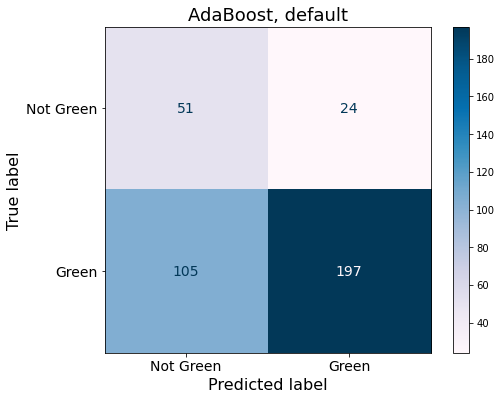

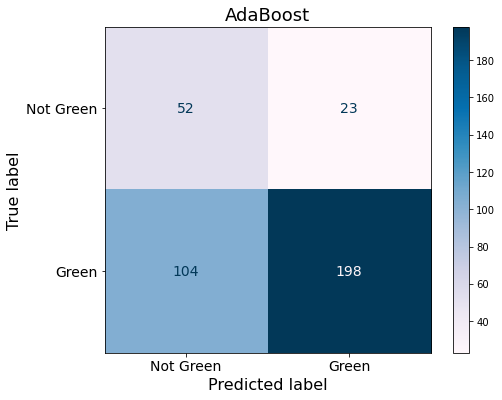

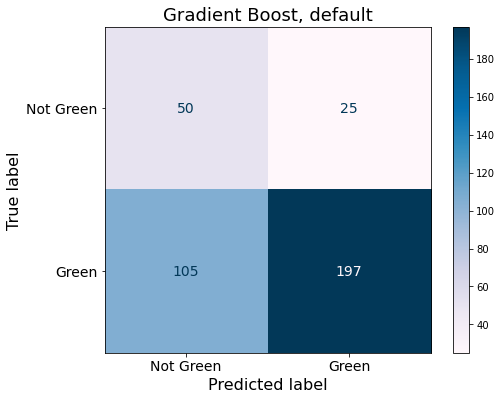

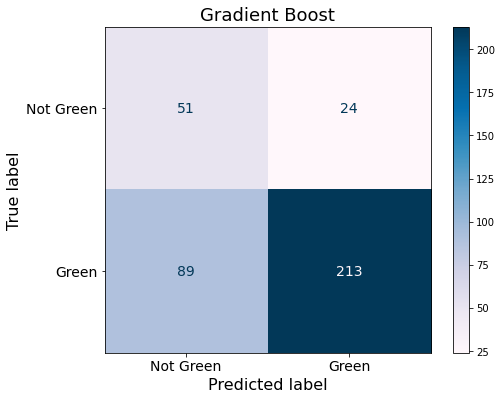

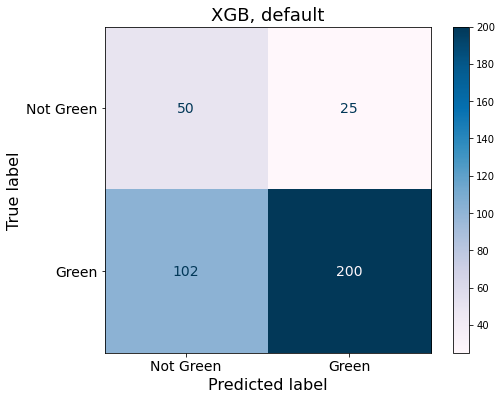

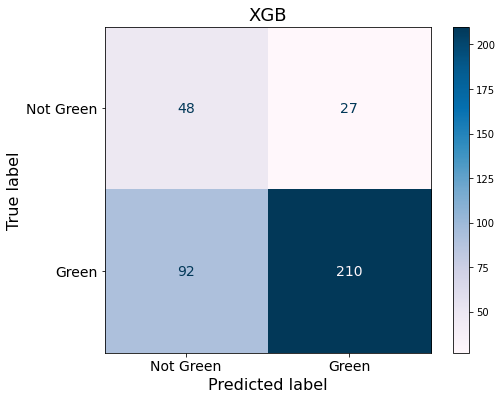

In [42]:
fig_con_Ada_d, ax_con_Ada_d = custom_confusin_matrix(y_tt_test, y_pred_ada_default, "AdaBoost, default")
fig_con_Ada, ax_con_Ada = custom_confusin_matrix(y_tt_test, y_pred_Ada, "AdaBoost")

fig_con_Grad_d, ax_con_Grad_d = custom_confusin_matrix(y_tt_test, y_pred_gradient_default, "Gradient Boost, default")
fig_con_Grad, ax_con_Ada_d = custom_confusin_matrix(y_tt_test, y_pred_Gradient, "Gradient Boost")

fig_con_XGB_d, ax_con_XGB_d = custom_confusin_matrix(y_tt_test, y_pred_xgb_default, "XGB, default")
fig_con_XGB, ax_con_XGB = custom_confusin_matrix(y_tt_test, y_pred_XGB, "XGB")


cm_figs = [fig_con_Ada_d, fig_con_Ada, 
           fig_con_Grad_d, fig_con_Grad, 
           fig_con_XGB_d, fig_con_XGB]
fig_file_names = ["CM AdaBoost, default", "CM AdaBoost",
                  "CM Gradient Boost, default", "CM Gradient Boost", 
                  "CM XGB, default", "CM XGB"]

# save_figures
if save_figures:
    for each_f, each_n in zip(cm_figs, fig_file_names):
        fig_name = f"{figure_path}{each_n}"
        each_f.savefig(f"{fig_name}.pdf", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.png", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.svg", 
                       dpi = 300, 
                        bbox_inches="tight")